In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-zipcode-database/zip_code_database.csv


In [2]:
zip_code_data = pd.read_csv("../input/us-zipcode-database/zip_code_database.csv")


zip_code_data1 = zip_code_data[["zip","latitude","longitude","state"]]
zip_code_data1.head()

,zip,latitude,longitude,state
0,501,40.81,-73.04,NY
1,544,40.81,-73.04,NY
2,601,18.16,-66.72,PR
3,602,18.38,-67.18,PR
4,603,18.43,-67.15,PR


In [3]:
zip_code_data1 =zip_code_data1.dropna()
zip_code_data1

,zip,latitude,longitude,state
0,501,40.81,-73.04,NY
1,544,40.81,-73.04,NY
2,601,18.16,-66.72,PR
3,602,18.38,-67.18,PR
4,603,18.43,-67.15,PR
...,...,...,...,...
42627,99926,55.14,-131.49,AK
42628,99927,56.30,-133.57,AK
42629,99928,55.45,-131.79,AK
42630,99929,56.41,-131.61,AK


In [4]:
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='PR'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='HI'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='AS'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='GU'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='VI'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='MP'].index, inplace=True)
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='Ak'].index, inplace=True)


In [5]:
zip_code_data1.drop(zip_code_data1.loc[zip_code_data1['state']=='Ak'].index, inplace=True)

(24.0, 50.0)

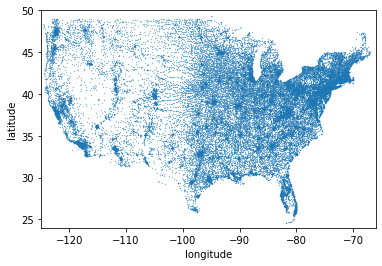

In [6]:
zip_code_data1.plot.scatter(x='longitude', y='latitude', s = 0.05)
axis = plt.gca()
axis.set_xlim([-125,-66])
axis.set_ylim([24,50])
